In [ ]:
import numpy as np

df = np.load('/content/drive/MyDrive/alkfjdsl2.npy')
df

array([[[[-0.7411765 , -0.45882353, -0.4117647 ],
         [-0.5921569 , -0.30980393, -0.2627451 ],
         [-0.5372549 , -0.22352941, -0.2       ],
         ...,
         [ 0.6627451 ,  0.7019608 ,  0.7882353 ],
         [ 0.6313726 ,  0.67058825,  0.77254903],
         [ 0.6313726 ,  0.67058825,  0.77254903]],

        [[-0.7254902 , -0.44313726, -0.39607844],
         [-0.6156863 , -0.33333334, -0.28627452],
         [-0.54509807, -0.23137255, -0.20784314],
         ...,
         [ 0.6313726 ,  0.67058825,  0.75686276],
         [ 0.6313726 ,  0.67058825,  0.77254903],
         [ 0.6392157 ,  0.6784314 ,  0.78039217]],

        [[-0.7176471 , -0.43529412, -0.3882353 ],
         [-0.5921569 , -0.30980393, -0.2627451 ],
         [-0.5372549 , -0.22352941, -0.2       ],
         ...,
         [ 0.6392157 ,  0.6784314 ,  0.78039217],
         [ 0.6392157 ,  0.6784314 ,  0.78039217],
         [ 0.654902  ,  0.69411767,  0.79607844]],

        ...,

        [[-0.19215687, -0.12156863,  0

In [ ]:
df.shape

(24, 256, 256, 3)

In [ ]:
df_rgb = df[...,::-1].copy()

In [ ]:
df_rgb.shape

(24, 256, 256, 3)

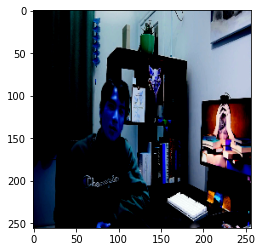

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(df[0])

#VGG test on another dataset

In [ ]:
import zipfile 

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/SF_data/new_train.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)
train_data = image_dataset_from_directory(directory='new_train',
                                          validation_split=0.2,
                                          subset='training',
                                          seed=42,
                                          label_mode='categorical',
                                          image_size=IMG_SIZE)

valid_data = image_dataset_from_directory(directory='new_train',
                                          validation_split=0.2,
                                          subset='validation',
                                          seed=42,
                                          label_mode='categorical',
                                          image_size=IMG_SIZE)

Found 7000 files belonging to 10 classes.
Using 5600 files for training.
Found 7000 files belonging to 10 classes.
Using 1400 files for validation.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ImportError: cannot import name 'layers' from partially initialized module 'keras' (most likely due to a circular import) (c:\Users\malik\miniconda3\envs\tf-asl\lib\site-packages\keras\__init__.py)

In [6]:
# import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=True)
vgg_model.trainable = False
vgg_model.summary()

ImportError: cannot import name 'layers' from partially initialized module 'keras' (most likely due to a circular import) (c:\Users\malik\miniconda3\envs\tf-asl\lib\site-packages\keras\__init__.py)

In [7]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

x = vgg_model.get_layer('fc2').output
x = Flatten(name='new_flatten')(x)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

vgg_model = Model(vgg_model.input, output)

ImportError: cannot import name 'layers' from partially initialized module 'keras' (most likely due to a circular import) (c:\Users\malik\miniconda3\envs\tf-asl\lib\site-packages\keras\__init__.py)

In [ ]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
175/175 [==============================] - 50s 228ms/step - loss: 1.5777 - accuracy: 0.5011 - val_loss: 1.1205 - val_accuracy: 0.6114
Epoch 2/5
175/175 [==============================] - 38s 218ms/step - loss: 0.9401 - accuracy: 0.6866 - val_loss: 1.1578 - val_accuracy: 0.6264
Epoch 3/5
175/175 [==============================] - 37s 212ms/step - loss: 0.7225 - accuracy: 0.7468 - val_loss: 1.1038 - val_accuracy: 0.6471
Epoch 4/5
175/175 [==============================] - 38s 215ms/step - loss: 0.5961 - accuracy: 0.7966 - val_loss: 1.0872 - val_accuracy: 0.6657
Epoch 5/5
175/175 [==============================] - 38s 213ms/step - loss: 0.4880 - accuracy: 0.8370 - val_loss: 1.0874 - val_accuracy: 0.6643


In [ ]:
vgg_model.layers[-2].output

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'new_flatten')>

In [ ]:
from keras import backend as K
import tensorflow as tf

get_fc1_output = K.function([vgg_model.layers[0].input],[vgg_model.layers[-2].output])

test_sample = tf.random.uniform(shape=(1,224,224,3), minval=0, maxval=1)
# test_sample.shape
layer_output = get_fc1_output([test_sample])[0]
layer_output

array([[0.       , 0.       , 1.34051  , ..., 0.       , 0.       ,
        0.5119427]], dtype=float32)

#test npy

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/train_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

there are 1047 directories and 0 files in /content/drive/MyDrive/train_data
there are 0 directories and 16 files in /content/drive/MyDrive/train_data/husband
there are 0 directories and 8 files in /content/drive/MyDrive/train_data/i
there are 0 directories and 5 files in /content/drive/MyDrive/train_data/i love you
there are 0 directories and 4 files in /content/drive/MyDrive/train_data/ice-skating
there are 0 directories and 6 files in /content/drive/MyDrive/train_data/if
there are 0 directories and 27 files in /content/drive/MyDrive/train_data/water
there are 0 directories and 14 files in /content/drive/MyDrive/train_data/we
there are 0 directories and 7 files in /content/drive/MyDrive/train_data/wash face
there are 0 directories and 7 files in /content/drive/MyDrive/train_data/wall
there are 0 directories and 11 files in /content/drive/MyDrive/train_data/visit
there are 0 directories and 5 files in /content/drive/MyDrive/train_data/wake up
there are 0 directories and 20 files in /co

In [ ]:
import zipfile 

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/test_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np

for dirpath, dirnames, filenames in os.walk("/content/test_data"):
  for name in filenames:
    type(dirnames)
    # path = "/content/test_data/" + str(dirnames) +'/' + name
    # x = np.load(path)
    # print(len(x))